In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [2]:
#create filepath
city_filepath = os.path.join("raw_data","city_data.csv")
ride_filepath = os.path.join("raw_data","ride_data.csv")

In [3]:
#read csv to data-frames
city_df = pd.read_csv(city_filepath)
ride_df = pd.read_csv(ride_filepath)

In [4]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
#merge the two data frames
merge_df = pd.merge(city_df, ride_df, on = "city", how = "outer")
merge_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [7]:
avg_fare = merge_df.groupby("city")["fare"].mean()

In [8]:
num_rides = merge_df.groupby("city")["ride_id"].count()

In [9]:
drivers = merge_df.groupby("city")["driver_count"].mean()

In [10]:
city_type = merge_df.groupby(["city"])["type"].unique()

In [11]:
bubble_df = pd.DataFrame({"Average Fare": avg_fare,
                          "Total Rides" : num_rides,
                          "Total Drivers" : drivers,
                          "City Type" : city_type
                         })

bubble_df.head()

,Average Fare,City Type,Total Drivers,Total Rides
city,,,,
Alvarezhaven,23.928710,[Urban],21,31
Alyssaberg,20.609615,[Urban],67,26
Anitamouth,37.315556,[Suburban],16,9
Antoniomouth,23.625000,[Urban],21,22
Aprilchester,21.981579,[Urban],49,19


In [12]:
#remove brackets from City type
bubble_df['City Type'] = bubble_df['City Type'].str[0]
bubble_df.head()

,Average Fare,City Type,Total Drivers,Total Rides
city,,,,
Alvarezhaven,23.928710,Urban,21,31
Alyssaberg,20.609615,Urban,67,26
Anitamouth,37.315556,Suburban,16,9
Antoniomouth,23.625000,Urban,21,22
Aprilchester,21.981579,Urban,49,19


In [13]:
bubble_df["City Type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
color_map = bubble_df["City Type"]
color_map = color_map.replace("Urban","r")
color_map = color_map.replace("Suburban","b")
color_map = color_map.replace("Rural","g")

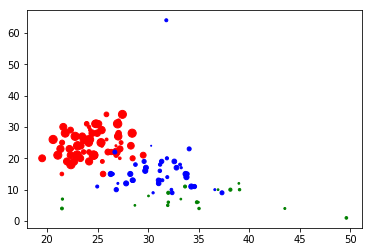

In [15]:

plt.scatter (bubble_df["Average Fare"], bubble_df["Total Rides"], c = color_map, s = bubble_df["Total Drivers"], cmap=cm.jet)
plt.show()

In [16]:
#groupby city type to get % of total fare
total_fare = pd.DataFrame(merge_df.groupby("type")["fare"].sum())
total_fare["fare"].sort_values()

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

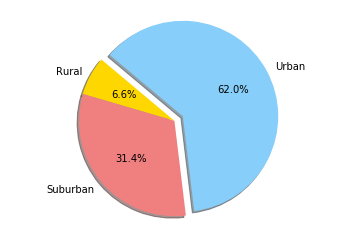

In [17]:
# Data to plot
labels = total_fare.index
sizes = total_fare["fare"]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [18]:
#groupby city type to get % of total rides
total_rides = pd.DataFrame(merge_df.groupby("type")["ride_id"].count())
total_rides["ride_id"].sort_values()

type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

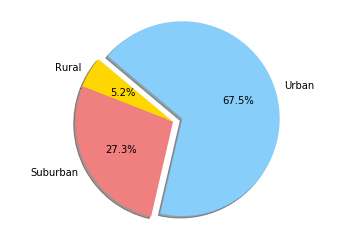

In [19]:
# Data to plot
labels = total_rides.index
sizes = total_rides["ride_id"]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [20]:
#groupby city type to get % of total drivers
total_drivers = pd.DataFrame(merge_df.groupby("type")["driver_count"].sum())
total_drivers["driver_count"].sort_values()

type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

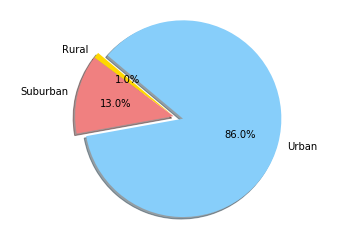

In [21]:
# Data to plot
labels = total_drivers.index
sizes = total_drivers["driver_count"]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()